In [4]:
"""
验证对称窗和周期窗用于overlap_add重建的区别
结论：周期窗能够完美重建，对称窗不能完美重建
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
# 不用科学计数法显示
np.set_printoptions(suppress=True)
window_len = 512  # 窗长
frame_len = 256  # 帧移

In [5]:
analysis_window_sycle = signal.windows.hann(window_len, sym=False)  # 最大值在中间，可以完美重建
analysis_window_sym = signal.windows.hann(window_len, sym=True)     # 最大值在两边，
synthesis_window = np.zeros(window_len)

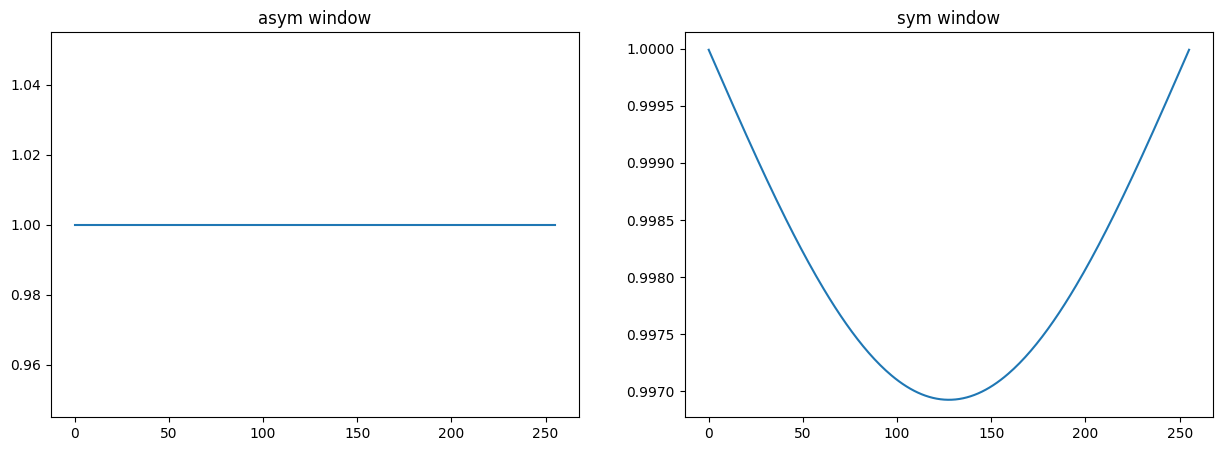

In [6]:
num_shift = window_len // frame_len  # 帧移数

output_asym = np.zeros(frame_len)
output_sym = np.zeros(frame_len)
for i in range(num_shift):
    # 从后往前取一帧
    output_asym += analysis_window_sycle[i * frame_len: (i + 1) * frame_len]
    output_sym += analysis_window_sym[i * frame_len: (i + 1) * frame_len]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('asym window')
plt.plot(output_asym)
plt.subplot(1, 2, 2)
plt.title('sym window')
plt.plot(output_sym)
# 设置纵坐标范围
# plt.ylim(0, 1.1)
plt.show()